# Intro

Juan Nunez-Iglesias  
Victorian Life Sciences Computation Initiative (VLSCI)  
University of Melbourne  

# Quick example: gene expression, without numpy


|        | Cell type A | Cell type B | Cell type C | Cell type D |
|--------|-------------|-------------|-------------|-------------|
| Gene 0 | 100         | 200         | 50          | 400         |
| Gene 1 | 50          | 0           | 0           | 100         |
| Gene 2 | 350         | 100         | 50          | 200         |

In [1]:
gene0 = [100, 200, 50, 400]
gene1 = [50, 0, 0, 100]
gene2 = [350, 100, 50, 200]
expression_data = [gene0, gene1, gene2]

Why is this a bad idea?

# Now with NumPy


In [2]:
import numpy as np
a = np.array(expression_data)
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


We are going to:

* Obtain an *RPKM* expression matrix
* Quantile normalize the data

RKPM: Reads per kilobase per million reads

Blabla about gene expression



using the awesome power of NumPy

# Inside a numpy ndarray

In [3]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [4]:
print(a.data)

In [5]:
print(a.flatten())
print(a.ravel())

[100 200  50 400  50   0   0 100 350 100  50 200]
[100 200  50 400  50   0   0 100 350 100  50 200]


In [6]:
bbytes = a.flatten().view(dtype=np.uint8)

In [7]:
# performance issues with C_alignment vs Fortran alignment
big_3d_image = np.random.rand(250,250,250)
print_info(big_3d_image)

number of elements: 15625000
number of dimensions: 3
shape: (250, 250, 250)
data type: float64
strides: (500000, 2000, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [8]:
%%timeit  big_3d_image = np.random.rand(250,250,250)
#big_3d_image *=5

#for plane in big_3d_image:
#    plane *= 5

# fortran contiguous
for i in range(big_3d_image.shape[1]):
    big_3d_image[:,:,i] *=5
#brighter_3d_image = big_3d_image*5.1

10 loops, best of 3: 177 ms per loop


In [9]:
bbytes

array([100,   0,   0,   0,   0,   0,   0,   0, 200,   0,   0,   0,   0,
         0,   0,   0,  50,   0,   0,   0,   0,   0,   0,   0, 144,   1,
         0,   0,   0,   0,   0,   0,  50,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,  94,
         1,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,
         0,   0,  50,   0,   0,   0,   0,   0,   0,   0, 200,   0,   0,
         0,   0,   0,   0,   0], dtype=uint8)

In [10]:
# a.ravel gives a flattened version of the array. Difference with flatten:
abytes = a.ravel().view(dtype=np.uint8)

In [11]:
print_info(abytes)

number of elements: 96
number of dimensions: 1
shape: (96,)
data type: uint8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [12]:
print(abytes[:24])

[100   0   0   0   0   0   0   0 200   0   0   0   0   0   0   0  50   0
   0   0   0   0   0   0]


### Example: take the transpose of `a`

In [13]:
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [14]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Example: skipping rows and columns with *slicing*

In [15]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [16]:
print_info(a.T[::2])

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int64
strides: (16, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [17]:
print_info(a.T[::2, ::2])

number of elements: 4
number of dimensions: 2
shape: (2, 2)
data type: int64
strides: (16, 64)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Getting a copy

In [18]:
b = a

In [19]:
print(b)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [20]:
a[0, 0] = 5
print(b)
a[0, 0] = 100

[[  5 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


# Advanced operations: axis-wise evaluation

In [21]:
expr = np.load('expr.npy')

In [22]:
print_info(expr)

number of elements: 7687500
number of dimensions: 2
shape: (20500, 375)
data type: uint32
strides: (4, 82000)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


This has the raw read count data. 20500 genes are read for 375 patients. However, each sample gets a different number of reads, so we want to normalize by the *library size*, which is the total number of reads across a column. (The total number of reads of one person)

The `np.sum` function returns the sum of all the elements of an array. With the `axis` argument, you can take the sum *along the given axis*.

In [23]:
lib_size = np.sum(expr, axis=0)

### Exercise

Generate a 10 x 3 array of random numbers. From each row, pick the number closest to 0.75. Make use of np.abs and np.argmax to find the column j which contains the closest element in each row.

In [24]:
x = np.random.rand(10,3)

def find_closest_value_per_column(x, value=0.75):
    
    xacc = abs(x - value)
    return np.argmin(xacc, axis=1)

find_closest_value_per_column(x)

array([0, 1, 2, 2, 2, 2, 2, 0, 0, 0])

In [25]:
np.argmax(x)

2

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
plot?

NameError: name 'max_idx' is not defined

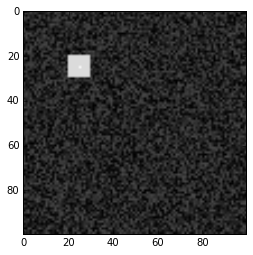

In [28]:
x = np.random.rand(100,100)

x[20:30,20:30] = 3
x[25,25] = 3.5

imshow(x, cmap='gray')
xm, ym =unravel_index(max_idx, x.shape)
max_idx = np.argmax(x)
unravel_index(max_idx, x.shape)
plot(ym, xm, 'ro')

# Advanced operations: broadcasting

In order to normalize every column by its corresponding library size, we have to *align* the two arrays' axes: each dimension must be either the same size, or one of the arrays must have size 1. Use `np.newaxis` to match the dimensions.

In [29]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis, :].shape)

(20500, 375)
(375,)
(1, 375)


However, NumPy will automatically prepend singleton dimensions until the array shapes match or there is an error:

In [30]:
np.all(expr / lib_size ==
       expr / lib_size[np.newaxis, :])

True

In [31]:
expr_lib = expr / lib_size

We also multiply by $10^6$ in order to keep the numbers on a readable scale (reads per million reads).

In [32]:
expr_lib *= 1e6

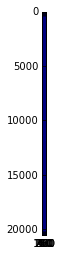

In [33]:
imshow(expr_lib)

Finally, longer genes are more likely to produce reads. So we normalize by the gene length (in kb) to produce a measure of expression called Reads Per Kilobase per Million reads (RPKM).

In [34]:
gene_len = np.load('gene-lens.npy')
print(gene_len.shape)

(20500,)


### Exercise: broadcast `expr_lib` and `gene_len` together to produce RPKM

In [35]:
gene_len.shape
lib_size.shape

(375,)

In [36]:
#rpkm[i,j] = 10**11 * expr[i,j] / (lib_size[j]*gene_size[i])
# option 1: Use np.newaxis
%timeit 10**3 * expr_lib / gene_len[:, np.newaxis]


10 loops, best of 3: 48.9 ms per loop


In [114]:
# probably better
rpkm = 10**3 * expr_lib / gene_len[:, np.newaxis]

In [38]:
# have the expr_lib matrix dancing around untill it works
rpkm2 = (10**3* expr_lib.T / gene_len).T

In [39]:
rpkm1 - rpkm2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [40]:
%timeit (10**11* (expr_lib / lib_size ).T / gene_len).T

10 loops, best of 3: 74.9 ms per loop


In [41]:
from matplotlib import pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    plt.figure()
    for density in density_per_col:
        plt.plot(x, density(x), *args, **kwargs)
    plt.xlabel('log-counts')
    plt.ylabel('frequency')
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()


In [24]:
%matplotlib inline

In [123]:
plt.style.use('ggplot')

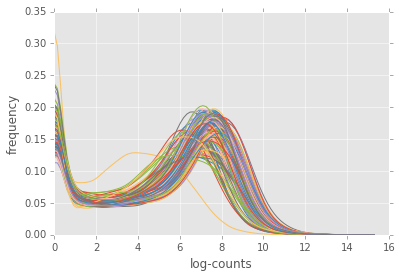

In [124]:
plot_col_density(np.log(expr+1))

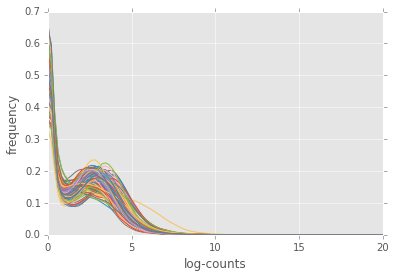

In [126]:
plot_col_density(np.log(rpkm + 1), xlim=(0, 20))

### Exercise: 3D broadcasting

Below, produce the array containing the sum of every element in `x` with every element in `y`

In [42]:
x = np.random.rand(3, 5)
y = np.random.randint(10, size=8)
z = x[..., newaxis] + y#[:,newaxis, newaxis]



In [43]:
print(x.shape)
print(y.shape)

(3, 5)
(8,)


In [44]:
# To use broadcasting efficiently, the dimensions need to either match or be one. 
# This is the explicit way.
x[newaxis,:,:] + y[:,newaxis, newaxis]

array([[[ 0.86462109,  0.45549902,  0.66052184,  0.96832494,  0.29765314],
        [ 0.18511956,  0.7596875 ,  0.6910831 ,  0.15048665,  0.47884507],
        [ 0.22415889,  0.95820765,  0.3423851 ,  0.56196965,  0.38359481]],

       [[ 0.86462109,  0.45549902,  0.66052184,  0.96832494,  0.29765314],
        [ 0.18511956,  0.7596875 ,  0.6910831 ,  0.15048665,  0.47884507],
        [ 0.22415889,  0.95820765,  0.3423851 ,  0.56196965,  0.38359481]],

       [[ 8.86462109,  8.45549902,  8.66052184,  8.96832494,  8.29765314],
        [ 8.18511956,  8.7596875 ,  8.6910831 ,  8.15048665,  8.47884507],
        [ 8.22415889,  8.95820765,  8.3423851 ,  8.56196965,  8.38359481]],

       [[ 4.86462109,  4.45549902,  4.66052184,  4.96832494,  4.29765314],
        [ 4.18511956,  4.7596875 ,  4.6910831 ,  4.15048665,  4.47884507],
        [ 4.22415889,  4.95820765,  4.3423851 ,  4.56196965,  4.38359481]],

       [[ 3.86462109,  3.45549902,  3.66052184,  3.96832494,  3.29765314],
        [ 3.18511

### Exercise: explicit broadcasting and stride tricks

Use `np.broadcast_arrays` to get the same-shape arrays that numpy adds together. Then use `print_info` on the output. Notice anything weird?

## Stride tricks

By manipulating the shape and strides of an array, we can produce a "virtual" array much bigger than its memory usage:

In [45]:
def repeat(arr, n):
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [46]:
a = repeat(np.random.rand(5), 4)
a

array([[ 0.54598241,  0.86746443,  0.31584841,  0.81297895,  0.20909736],
       [ 0.54598241,  0.86746443,  0.31584841,  0.81297895,  0.20909736],
       [ 0.54598241,  0.86746443,  0.31584841,  0.81297895,  0.20909736],
       [ 0.54598241,  0.86746443,  0.31584841,  0.81297895,  0.20909736]])

In [47]:
print_info(a)

number of elements: 20
number of dimensions: 2
shape: (4, 5)
data type: float64
strides: (0, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Exercise: `np.lib.stride_tricks.as_strided`

Use `as_strided` to produce a sliding-window view of a 1D array.

In [49]:
def sliding_window(arr, size=2):
    """Produce an array of sliding window views of `arr`
    
    Parameters
    ----------
    arr : 1D array, shape (N,)
        The input array.
    size : int, optional
        The size of the sliding window.
        
    Returns
    -------
    arr_slide : 2D array, shape (N - size + 1, size)
        The sliding windows of size `size` of `arr`.
        
    Examples
    --------
    >>> a = np.array([0, 1, 2, 3])
    >>> sliding_window(a, 2)
    array([[0, 1],
           [1, 2],
           [2, 3]])
    """
    N = len(arr)
    desired_shape = (N - size + 1, size)
    s = arr.strides[0] # like this it will be independent on the datatype
    
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=desired_shape,
                                           strides=(s, s))
    #return arr  # fix this

In [50]:
# test your code here
sliding_window(np.arange(8), 3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

# Fancy indexing

You can index arrays with slicing, but also with boolean arrays (including broadcasting!), integer arrays, and individual indices along multiple dimensions.

In [52]:
values = np.array([0, 5, 99])
selector = np.random.randint(0, 3, size=(3, 4))
print(selector)
print(values[selector])

[[2 2 1 1]
 [2 1 0 2]
 [1 1 0 0]]
[[99 99  5  5]
 [99  5  0 99]
 [ 5  5  0  0]]


### Exercise: quantile normalization

Quantile Normalization(https://en.wikipedia.org/wiki/Quantile_normalization) is a method to align distributions. Implement it using NumPy axis-wise operations and fancy indexing.

*Hint: look for documentation for `scipy.mstats.rankdata`, `np.sort`, and `np.argsort`.*

In [90]:
np.mgrid[0:4,0:3][1]

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [88]:
repeat(np.arange(0,3),4)

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [140]:
testlist = np.array([1.1,2.1, 2.1, 2.1, 3.1, 6.1, 4.1, 5.1])

In [141]:
indices = np.argsort(testlist)
unique_items,number_of_occurences = np.unique(testlist, return_counts=True)

In [142]:
indices, unique_items, number_of_occurences

(array([0, 1, 2, 3, 4, 6, 7, 5]),
 array([ 1.1,  2.1,  3.1,  4.1,  5.1,  6.1]),
 array([1, 3, 1, 1, 1, 1]))

In [143]:
index = 0
while index < len(testlist):
    if number_of_occurences[i] == 1:
        pass
    else:
        indices[index+1:index+number_of_occurences[i]] -= np.arange(number_of_occurences[i]-1)
        indices[index+number_of_occurences[i]:] -= number_of_occurences[i]-1
    index += 1    
indices

array([0, 1, 2, 3, 4, 6, 7, 5])

In [138]:
index

6

In [110]:
np.unique(testdata)

for r in testdata.T:
    print (np.unique(r, return_counts=True))
    

(array([ 2.,  3.,  4.,  5.]), array([1, 1, 1, 1]))
(array([ 1.,  2.,  4.]), array([1, 1, 2]))
(array([ 3.,  4.,  6.,  8.]), array([1, 1, 1, 1]))


In [111]:
np.argsort?

In [104]:
testdata = np.loadtxt('./testdata.dat', delimiter=',')
print(testdata)
# convert into an array with rank values according to column
rank_idx = np.argsort(np.argsort(testdata,axis=0), axis=0)

#np.argsort(rank_idx, axis=0)

# TODO SOLVE FOR 2 values of 4


# sort the input data
sorted_testdata = np.sort(testdata, axis=0)
# determine the ranks by computing the mean for each row
ranks = np.mean(sorted_testdata, axis=1)
ranks[rank_idx]
#print(rank_idx)
#testdata[rank_idx, np.mgrid[0:4,0:3][1]]


[[ 5.  4.  3.]
 [ 2.  1.  4.]
 [ 3.  4.  6.]
 [ 4.  2.  8.]]


array([[ 5.66666667,  4.66666667,  2.        ],
       [ 2.        ,  2.        ,  3.        ],
       [ 3.        ,  5.66666667,  4.66666667],
       [ 4.66666667,  3.        ,  5.66666667]])

array([ 2.        ,  3.        ,  4.66666667,  5.66666667])

In [100]:
np.sort(testdata, axis=0)

array([[ 2.,  1.,  3.],
       [ 3.,  2.,  4.],
       [ 4.,  4.,  6.],
       [ 5.,  4.,  8.]])

In [112]:
def qnorm(x):
    """Quantile normalize an input matrix.
    
    Parameters
    ----------
    x : 2D array of float, shape (M, N)
        The input data, with each column being a
        distribution to normalize.
        
    Returns
    -------
    xn : 2D array of float, shape (M, N)
        The normalized data.
    """
    # convert into an array with rank values according to column
    rank_idx = np.argsort(np.argsort(x,axis=0), axis=0)
    # sort the input data
    sorted_x = np.sort(x, axis=0)
    # determine the ranks by computing the mean for each row
    ranks = np.mean(sorted_x, axis=1)
    xn = ranks[rank_idx]
    return xn

In [115]:
logexpr = np.log(expr + 1)
logrpkm = np.log(rpkm + 1)

In [116]:
logexprn = qnorm(logexpr)
logrpkmn = qnorm(logrpkm)

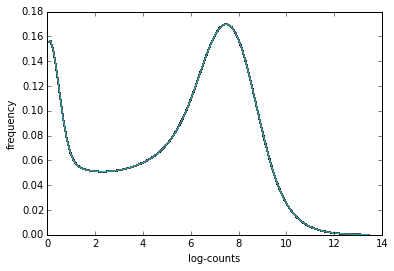

In [117]:
plot_col_density(logexprn)

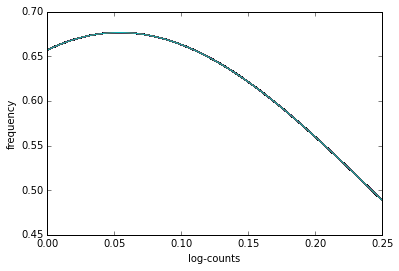

In [118]:
plot_col_density(logrpkmn, xlim=(0, 0.25))

## Advanced exercise Jack's dilemma

(If time permits.)

```email
Date: Wed, 16 Jul 2008 16:45:37 -0500
From: Jack Cook
To: <numpy-discussion@scipy.org>
Subject: Numpy Advanced Indexing Question
```

Greetings,

I have an I,J,K 3D volume of amplitude values at regularly sampled
time intervals. I have an I,J 2D slice which contains a time (K)
value at each I, J location. What I would like to do is extract a
subvolume at a constant +/- K window around the slice. Is there an
easy way to do this using advanced indexing or some other method?
Thanks in advanced for your help.

-- Jack

In [ ]:
# "data"

ni, nj, nk = (10, 15, 20)
amplitude = np.random.rand(ni, nj, nk)
horizon = np.random.randint(5, 15, size=(ni, nj))

## Even more advanced: NumPy Array Interface

An author of a foreign package (included with the exercizes as
``problems/mutable_str.py``) provides a string class that
allocates its own memory:

```ipython
In [1]: from mutable_str import MutableString
In [2]: s = MutableString('abcde')
In [3]: print s
abcde
```

You'd like to view these mutable (*mutable* means the ability to modify in place)
strings as ndarrays, in order to manipulate the underlying memory.

Add an __array_interface__ dictionary attribute to s, then convert s to an
ndarray. Numerically add "2" to the array (use the in-place operator ``+=``).

Then print the original string to ensure that its value was modified.

> **Hint:** Documentation for NumPy's ``__array_interface__``
  may be found [in the online docs](http://docs.scipy.org/doc/numpy/reference/arrays.interface.html).

Here's a skeleton outline:

In [ ]:
import numpy as np
from mutable_str import MutableString

s = MutableString('abcde')

# --- EDIT THIS SECTION ---

# Create an array interface to this foreign object
s.__array_interface__ = {'data' : (XXX, False), # (ptr, is read_only?)
                         'shape' : XXX,
                         'typestr' : '|u1', # typecode unsigned character
                         }

# --- EDIT THIS SECTION ---

print 'String before converting to array:', s
sa = np.asarray(s)

print 'String after converting to array:', sa

sa += 2
print 'String after adding "2" to array:', s